# Data Loading

Dataset Link: https://www.kaggle.com/datasets/devansodariya/student-performance-data

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

os.environ["OMP_NUM_THREADS"] = "2"
warnings.filterwarnings("ignore", category=UserWarning, message=".*KMeans is known to have a memory leak.*")

# Load the dataset
file_path = 'student_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify loading
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


# Data Preprocessing

In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = 'student_data.csv'  # Update with the correct path to your file
df = pd.read_csv(file_path)

# 1. Handle missing values (if any)
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

# Fill missing values (example: filling with mode for categorical and median for numerical columns)
df['famsize'] = df['famsize'].fillna(df['famsize'].mode()[0])  # Filling with mode
df['Medu'] = df['Medu'].fillna(df['Medu'].median())  # Filling with median

# 2. Encode categorical variables
# For categorical columns like "sex", "school", "Mjob", etc., we need to encode them into numeric values
label_encoder = LabelEncoder()

categorical_columns = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Apply label encoding
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# 3. Feature scaling (Standardization/Normalization)
# Select numeric columns for scaling
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
                   'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# Standardize the numeric columns (mean=0, variance=1)
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 4. Check the data after preprocessing
print("Data after preprocessing:\n", df.head())

Missing Data:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Data after preprocessing:
   school  sex       age  address  famsize  Pstatus      Medu      Fedu  Mjob  \
0     GP    0  1.023046        1        0        0  1.143856  1.360371     0   
1     GP    0  0.238380        1        0        1 -1.600009 -1.399970     0   
2     GP    0 -1.330954        1        1        1 -1.600009 -1.399970     0   
3     GP    0 -1.330954        1        0        1  1.143856 -0.479857     1   
4     GP    0 -0.

# Visualizations

## Bar Chart

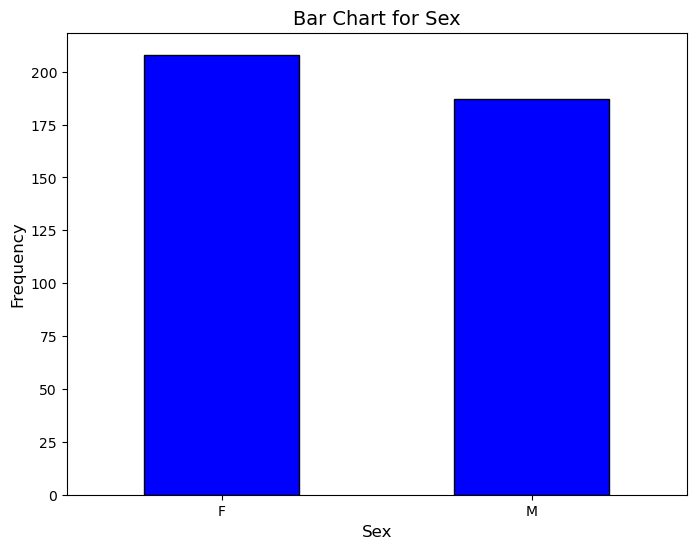

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'student_data.csv'  # Update with the correct path to your file
df = pd.read_csv(file_path)

# Example: Create a bar chart for the 'sex' column (male vs female)
category_column = 'sex'

# Count the frequency of each category
category_counts = df[category_column].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Set figure size (optional)
category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Set the title and labels
plt.title(f'Bar Chart for {category_column.capitalize()}', fontsize=14)
plt.xlabel(category_column.capitalize(), fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.xticks(rotation=0)
plt.show()

## Line Graph

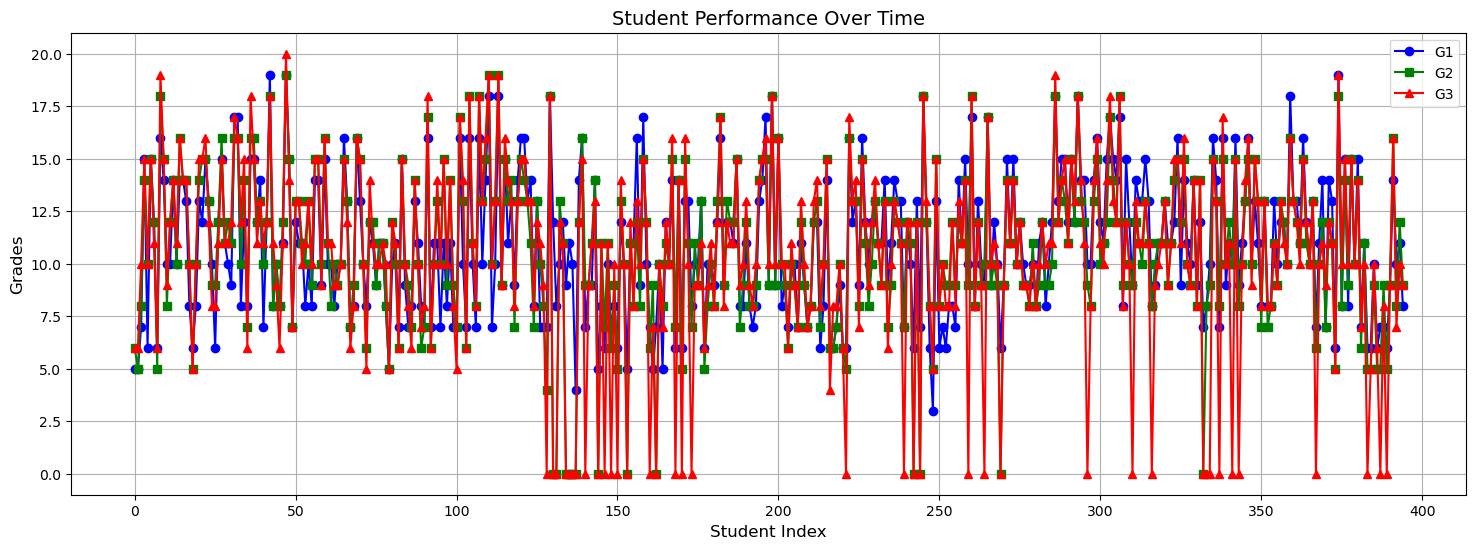

In [97]:
x = df.index  # Use the index of the dataset (could represent students)
y1 = df['G1']  # First period grade
y2 = df['G2']  # Second period grade
y3 = df['G3']  # Final period grade

# Create the line graph
plt.figure(figsize=(18, 6))  # Set figure size (optional)
plt.plot(x, y1, label='G1', marker='o', color='blue')  # Line for G1 grades
plt.plot(x, y2, label='G2', marker='s', color='green')  # Line for G2 grades
plt.plot(x, y3, label='G3', marker='^', color='red')  # Line for G3 grades

# Add titles and labels
plt.title('Student Performance Over Time', fontsize=14)
plt.xlabel('Student Index', fontsize=12)
plt.ylabel('Grades', fontsize=12)

# Show a legend
plt.legend()

# Display the plot
plt.grid(True)  # Add grid lines for better readability
plt.show()

## Heatmap

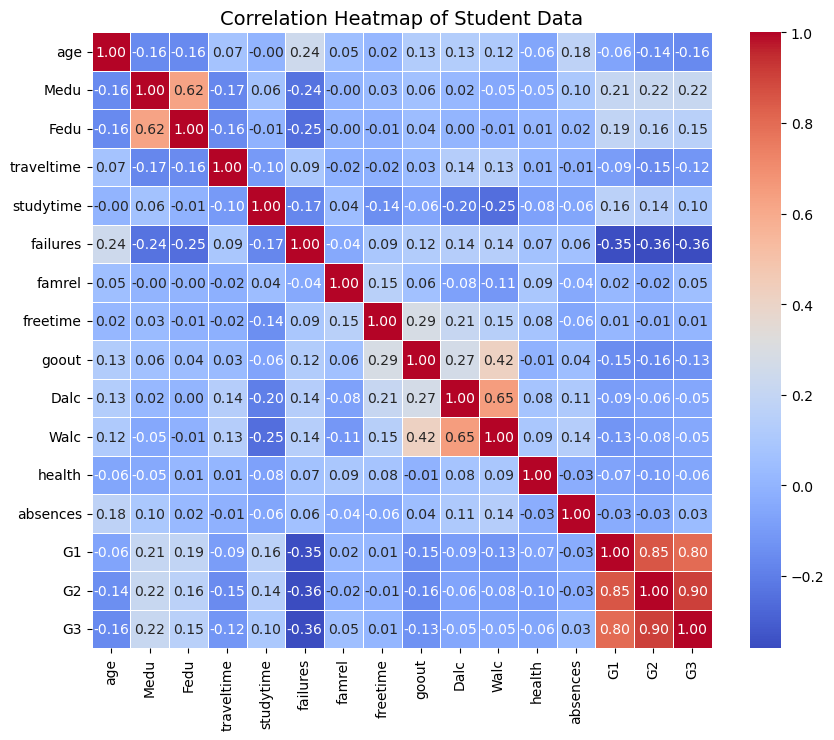

In [100]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Student Data', fontsize=14)

# Display the plot
plt.show()

## Elbow Plot

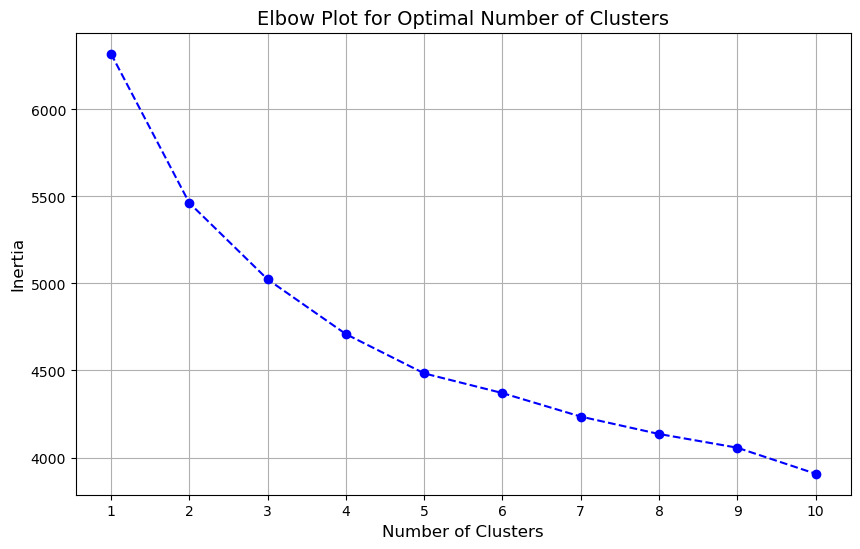

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'student_data.csv'  # Update with the correct path to your file
df = pd.read_csv(file_path)

# Select only numeric columns for clustering
numeric_df = df.select_dtypes(include=['number'])

# Standardize the numeric columns (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# List to store inertia values for different cluster sizes
inertia_values = []

# Range of k (number of clusters) to evaluate
k_range = range(1, 11)

# Fit KMeans for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', color='b', linestyle='--')
plt.title('Elbow Plot for Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_range)
plt.grid(True)

# Display the plot
plt.show()

## Clustering Analysis

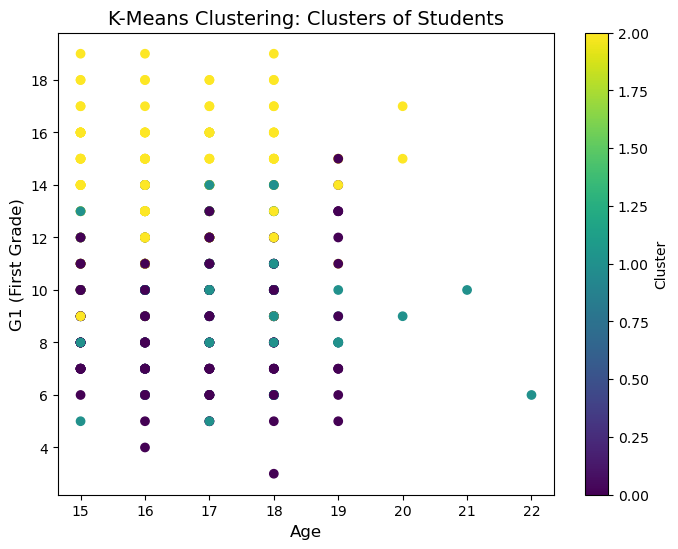

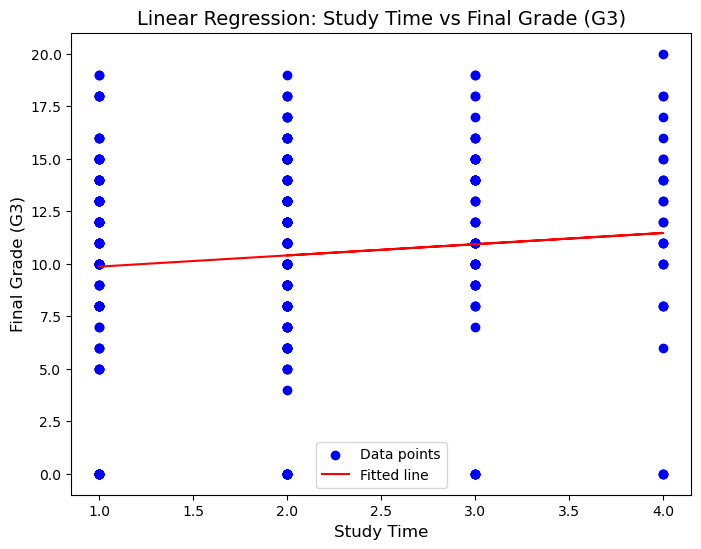

Mean Squared Error (MSE): 20.74
R-squared (R²): 0.01


In [110]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Set the environment variable to avoid memory leak in KMeans (on Windows)
os.environ["OMP_NUM_THREADS"] = "2"

# Suppress KMeans memory leak warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*KMeans is known to have a memory leak.*")

# Load the dataset
file_path = 'student_data.csv'  # Update with the correct path to your file
df = pd.read_csv(file_path)

# Select only numeric columns for clustering and regression
numeric_df = df.select_dtypes(include=['number'])

# Standardize the numeric columns (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# --- Step 1: K-Means Clustering ---
# Perform K-Means clustering (using 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters (2D projection of clusters)
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['G1'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering: Clusters of Students', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('G1 (First Grade)', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

# --- Step 2: Line Fitting (Linear Regression) ---
# Here we fit a linear regression model to predict G3 (final grade) from studytime
X = df[['studytime']]  # Feature (studytime)
y = df['G3']  # Target variable (final grade)

# Create and train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predict the target variable
y_pred = lin_reg.predict(X)

# Plot the line fitting
plt.figure(figsize=(8, 6))
plt.scatter(df['studytime'], df['G3'], color='blue', label='Data points')
plt.plot(df['studytime'], y_pred, color='red', label='Fitted line')
plt.title('Linear Regression: Study Time vs Final Grade (G3)', fontsize=14)
plt.xlabel('Study Time', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.legend()
plt.show()

# --- Step 3: Evaluation of the Line Fitting ---
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate R-squared (R²)
r_squared = r2_score(y, y_pred)

# Output MSE and R-squared
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r_squared:.2f}")